In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset_phishing.csv')
pd.set_option('display.max_columns', None)

# Main target: classify websites into phishing or letigitmate websites.

# **Data Cleaning and Feature Selection**

In [ ]:
df.head(10)

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   
5                   http://appleid.apple.com-app.es/          32   
6                                http://www.mutuo.it          19   
7  http://www.shadetreetechnology.com/V4/validati...          81   
8         http://vamoaestudiarmedicina.blogspot.com/          42   
9  https://parade.com/425836/joshwigler/the-amazi...         104   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0               19   0        3           0      0      0       0      0   
1               23   1        1           0      0      0       0      0   
2               50   1        4           1      0      1       2      0   
3               11   0        2           0      0      0       0      0   
4               15   0        2           2      0      0       0      0   
5               24   0        3           1      0      0       0      0   
6               12   0        2           0      0      0       0      0   
7               27   1        2           0      0      0       0      0   
8               34   0        2           0      0      0       0      0   
9               10   0        1          10      0      0       0      0   

   nb_eq  nb_underscore  nb_tilde  nb_percent  nb_slash  nb_star  nb_colon  \
0      0              0         0           0         3        0         1   
1      0              0         0           0         5        0         1   
2      3              2         0           0         5        0         1   
3      0              0         0           0         2        0         1   
4      0              0         0           0         5        0         1   
5      0              0         0           0         3        0         1   
6      0              0         0           0         2        0         1   
7      0              0         0           0         5        0         1   
8      0              0         0           0         3        0         1   
9      0              0         0           0         6        0         1   

   nb_comma  nb_semicolumn  nb_dollar  nb_space  nb_www  nb_com  nb_dslash  \
0         0              0          0         0       1       0          0   
1         0              0          0         0       0       0          0   
2         0              0          0         0       0       1          0   
3         0              0          0         0       0       0          0   
4         0              0          0         0       1       0          0   
5         0              0          0         0       0       1          0   
6         0              0          0         0       1       0          0   
7         0              0          0         0       1       0          0   
8         0              0          0         0       0       0          0   
9         0              0          0         0       0       0          0   

   http_in_path  https_token  ratio_digits_url  ratio_digits_host  punycode  \
0             0            1          0.000000                0.0         0   
1             0            1          0.220779                0.0         0   
2             0            0          0.150794                0.0         0   
3             0            1          0.000000                0.0         0   
4             0            1          0.000000                0.0         0   
5             0            1          0.000000                0.0         0   
6             0            1          0.000000                0.0         0   
7             0            1          0.259259                0.0         0   
8             0            1      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

### Just replacing status(phishing vs legitimate) with target(0 vs 1)

In [ ]:
df['target'] = (df['status'] == 'phishing').astype(int)
df.drop('status', axis = 1, inplace = True)

In [ ]:
non_features = df['url']
df.drop('url', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

target
0    5715
1    5715
Name: count, dtype: int64


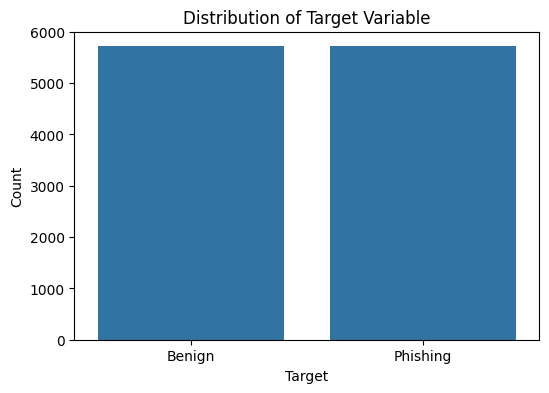

In [ ]:
print(df['target'].value_counts())

plt.figure(figsize = (6, 4))
sns.countplot(x = 'target', data = df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Phishing'])
plt.show()

### Remove duplicate columns

In [ ]:
print(df.duplicated().sum())

174


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(11256, 88)

target
0    5715
1    5541
Name: count, dtype: int64


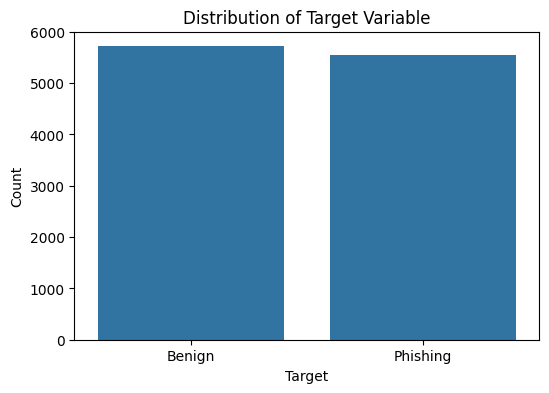

In [ ]:
print(df['target'].value_counts())
plt.figure(figsize = (6, 4))
sns.countplot(x = 'target', data = df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Phishing'])
plt.show()

### If there are any columns with only 1 unique value, remove them(no use)

In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns to drop:", constant_cols)

Constant columns to drop: ['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_intErrors', 'submit_email', 'sfh']


In [ ]:
df.drop(constant_cols, axis = 1, inplace = True)
df.shape

(11256, 82)

In [ ]:
pd.set_option('display.max_rows', None)

df.nunique()


length_url                     324
length_hostname                 83
ip                               2
nb_dots                         19
nb_hyphens                      27
nb_at                            5
nb_qm                            4
nb_and                          15
nb_eq                           16
nb_underscore                   17
nb_tilde                         2
nb_percent                      25
nb_slash                        22
nb_star                          2
nb_colon                         6
nb_comma                         5
nb_semicolumn                   15
nb_dollar                        5
nb_space                         9
nb_www                           3
nb_com                           7
nb_dslash                        2
http_in_path                     5
https_token                      2
ratio_digits_url              1414
ratio_digits_host              241
punycode                         2
port                             2
tld_in_path                      2
tld_in_subdomain                 2
abnormal_subdomain               2
nb_subdomains                    3
prefix_suffix                    2
random_domain                    2
shortening_service               2
path_extension                   2
nb_redirection                   7
nb_external_redirection          2
length_words_raw                54
char_repeat                     55
shortest_words_raw              25
shortest_word_host              34
shortest_word_path              33
longest_words_raw              119
longest_word_host               49
longest_word_path              120
avg_words_raw                  896
avg_word_host                  174
avg_word_path                  757
phish_hints                      9
domain_in_brand                  2
brand_in_subdomain               2
brand_in_path                    2
suspecious_tld                   2
statistical_report               3
nb_hyperlinks                  691
ratio_intHyperlinks           3131
ratio_extHyperlinks           3131
nb_extCSS                       33
ratio_extRedirection           894
ratio_extErrors                635
login_form                       2
external_favicon                 2
links_in_tags                  473
ratio_intMedia                 490
ratio_extMedia                 490
iframe                           2
popup_window                     2
safe_anchor                   1083
onmouseover                      2
right_clic                       2
empty_title                      2
domain_in_title                  2
domain_with_copyright            2
whois_registered_domain          2
domain_registration_length    1659
domain_age                    4430
web_traffic                   4744
dns_record                       2
google_index                     2
page_rank                       11
target                           2
dtype: int64

# Feature Selection

### Find correlation of all features with target, to see if there is some linear relationship.


In [ ]:
correlation_with_target = df.corr()['target'].sort_values(ascending = False)
print("\n  Correlation with Target Variable:")

top_positive_corr = correlation_with_target[1:11]
top_negative_corr = correlation_with_target[-10:]

print(". Top 10 Positive Correlations:")
print(top_positive_corr)

print("\n. Top 10 Negative Correlations:")
print(top_negative_corr)



  Correlation with Target Variable:
. Top 10 Positive Correlations:
google_index        0.728007
ratio_digits_url    0.356797
domain_in_title     0.343122
phish_hints         0.341750
ip                  0.324492
nb_qm               0.298804
length_url          0.253402
nb_slash            0.252473
nb_eq               0.236016
length_hostname     0.234674
Name: target, dtype: float64

. Top 10 Negative Correlations:
ratio_extRedirection    -0.163168
domain_with_copyright   -0.169403
safe_anchor             -0.172545
links_in_tags           -0.182452
ratio_intMedia          -0.189384
ratio_intHyperlinks     -0.241324
domain_age              -0.338930
nb_hyperlinks           -0.339654
nb_www                  -0.438696
page_rank               -0.517701
Name: target, dtype: float64


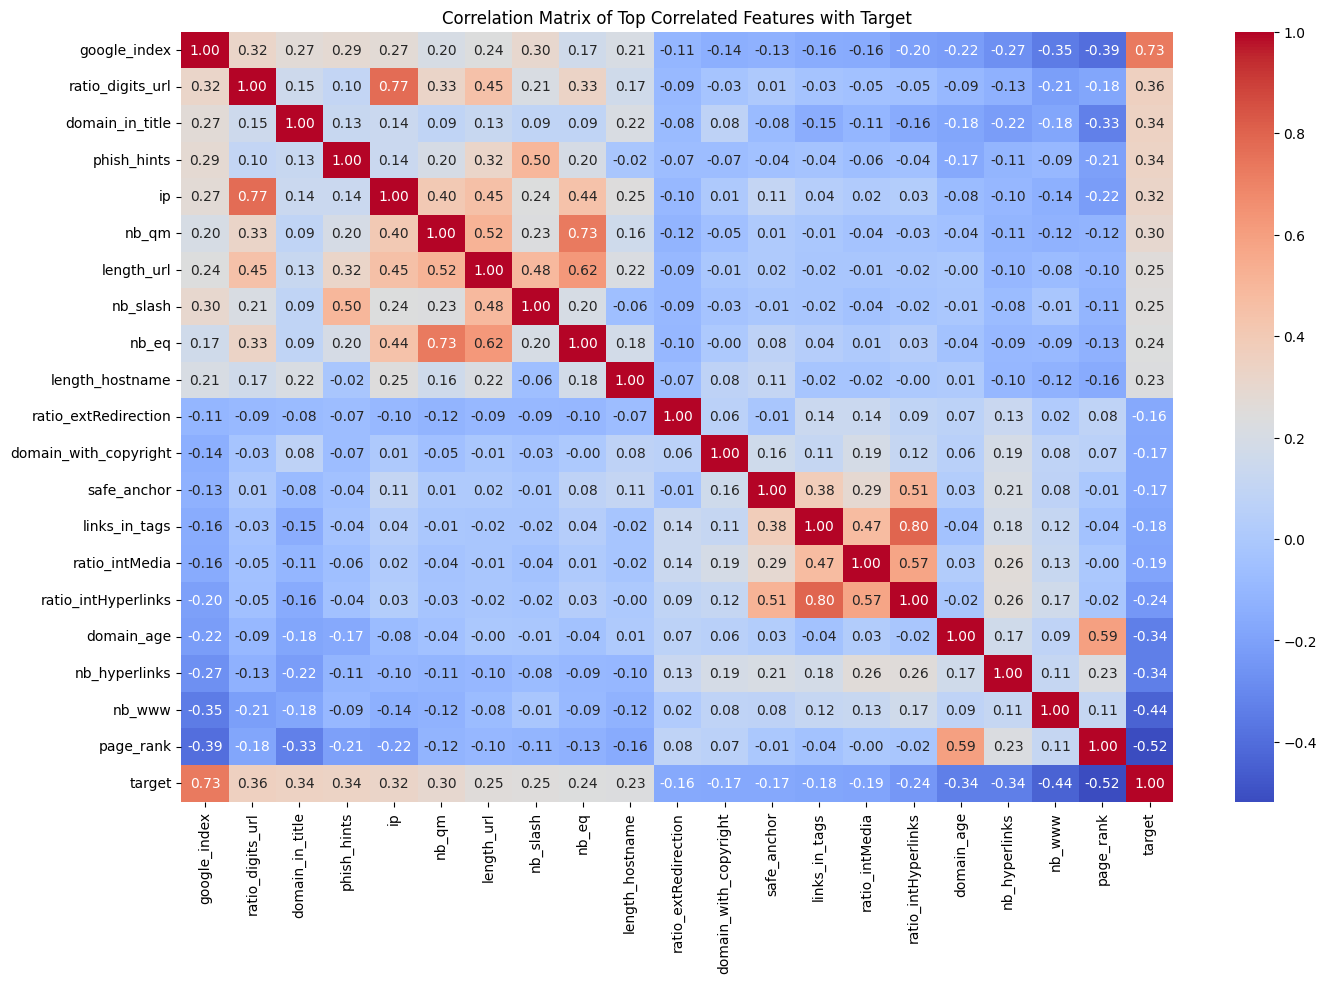

In [ ]:
selected_features_for_heatmap = pd.concat([top_positive_corr, top_negative_corr]).index.tolist()
selected_features_for_heatmap.append('target')

plt.figure(figsize = (16, 10))
sns.heatmap(df[selected_features_for_heatmap].corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix of Top Correlated Features with Target')
plt.show()

### No significant information from the correlation matrix, so trying Mutual-Information for feature extraction.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns = 'target')
y = df['target']

mi = mutual_info_classif(X, y, random_state = 42)
mi_series = pd.Series(mi, index = X.columns).sort_values(ascending = False)


print(mi_series)

google_index                  0.300281
web_traffic                   0.294764
domain_age                    0.272933
ratio_intHyperlinks           0.236245
ratio_extHyperlinks           0.233154
nb_hyperlinks                 0.228172
page_rank                     0.220551
safe_anchor                   0.172021
domain_registration_length    0.141448
links_in_tags                 0.114899
longest_word_path             0.110146
ratio_extRedirection          0.108580
nb_www                        0.098632
ratio_digits_url              0.095676
phish_hints                   0.090095
avg_word_path                 0.089250
ratio_extErrors               0.082305
char_repeat                   0.081338
longest_words_raw             0.078311
shortest_word_host            0.073746
length_url                    0.072402
avg_word_host                 0.070969
length_hostname               0.070892
avg_words_raw                 0.069283
ratio_intMedia                0.067908
domain_in_title          

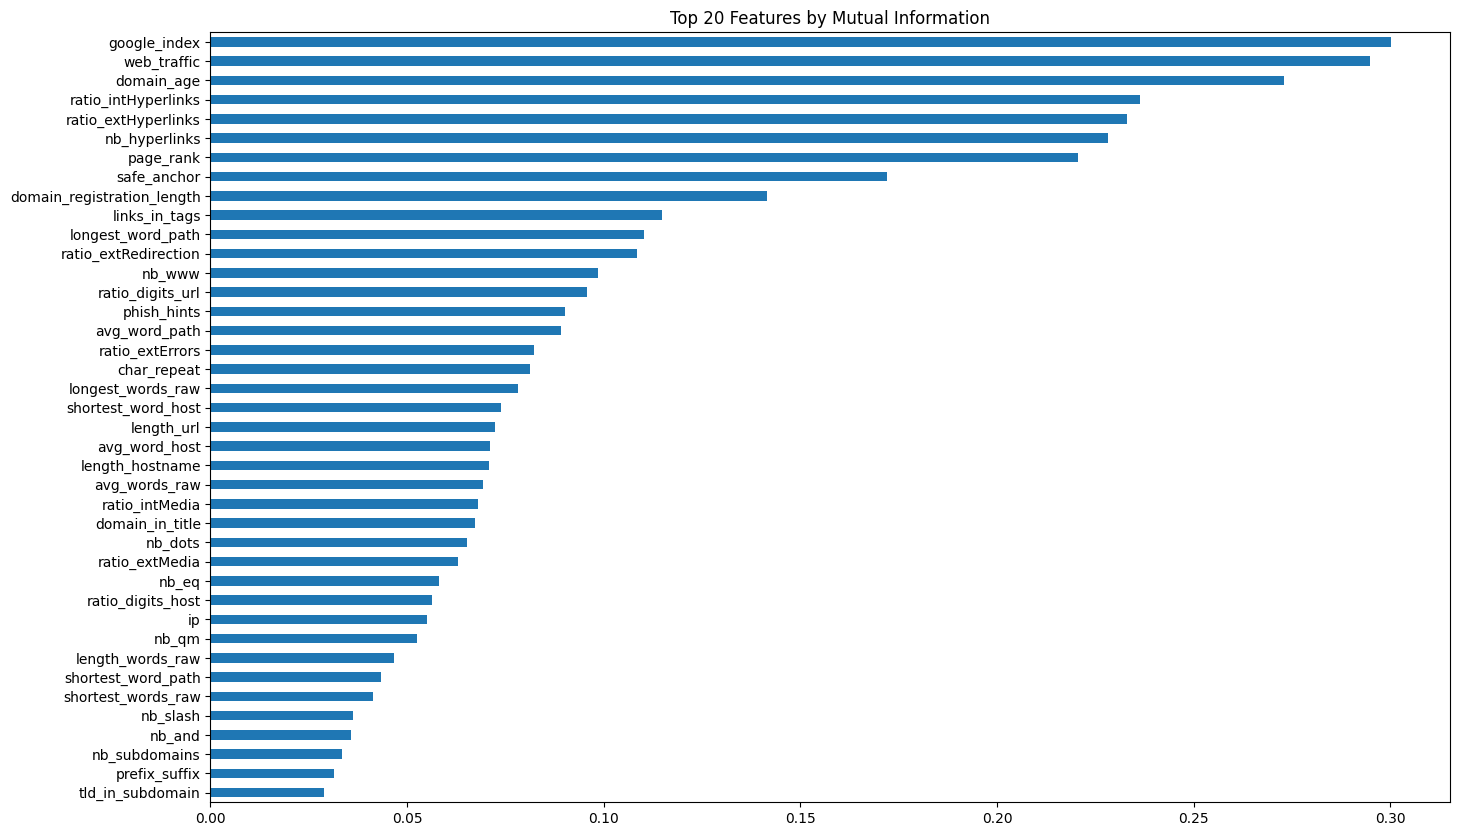

In [ ]:
mi_series.head(40).plot(kind = 'barh', title = 'Top 20 Features by Mutual Information', figsize = (16,10))
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top_features = mi_series[mi_series > 0.1].sort_values(ascending = False)
top_features.size

12

### Select top 12 features based on maximum Mutual Information, very few features seem to contribute meaningfully to the classification.

In [ ]:
df_selected = pd.concat([df[top_features.index], df['target']], axis = 1)
print(df_selected.shape)
df_selected.head(10)

(11256, 13)


google_index  web_traffic  domain_age  ratio_intHyperlinks  \
0             1            0          -1             0.529412   
1             1            0        5767             0.966667   
2             1      5828815        4004             1.000000   
3             0       107721          -1             0.973154   
4             0         8725        8175             0.470588   
5             1            0          -1             0.300000   
6             0            0        7529             0.081633   
7             1            0        5767             0.966667   
8             0            0        7298             0.206349   
9             0         6774        9368             0.778571   

   ratio_extHyperlinks  nb_hyperlinks  page_rank  safe_anchor  \
0             0.470588             17          4     0.000000   
1             0.033333             30          2   100.000000   
2             0.000000              4          0   100.000000   
3             0.026846            149          3    62.500000   
4             0.529412            102          6     0.000000   
5             0.700000             10          0     0.000000   
6             0.918367             98          1   100.000000   
7             0.033333             30          2   100.000000   
8             0.793651             63          5    27.272727   
9             0.221429            140          5    58.139535   

   domain_registration_length  links_in_tags  longest_word_path  \
0                          45      80.000000                  6   
1                          77     100.000000                 32   
2                          14     100.000000                 17   
3                          62     100.000000                  0   
4                         224      76.470588                 11   
5                           0     100.000000                  0   
6                         170       0.000000                  0   
7                          76     100.000000                 32   
8                         371       0.000000                  0   
9                         128      93.103448                 10   

   ratio_extRedirection  target  
0              0.875000       0  
1              0.000000       1  
2              0.000000       1  
3              0.250000       0  
4              0.537037       0  
5              0.571429       1  
6              0.000000       0  
7              0.000000       1  
8              0.380000       0  
9              0.193548       0

In [ ]:
df_selected.nunique()

google_index                     2
web_traffic                   4744
domain_age                    4430
ratio_intHyperlinks           3131
ratio_extHyperlinks           3131
nb_hyperlinks                  691
page_rank                       11
safe_anchor                   1083
domain_registration_length    1659
links_in_tags                  473
longest_word_path              120
ratio_extRedirection           894
target                           2
dtype: int64

### Correlation Matrix again shows no significant relationship to target.

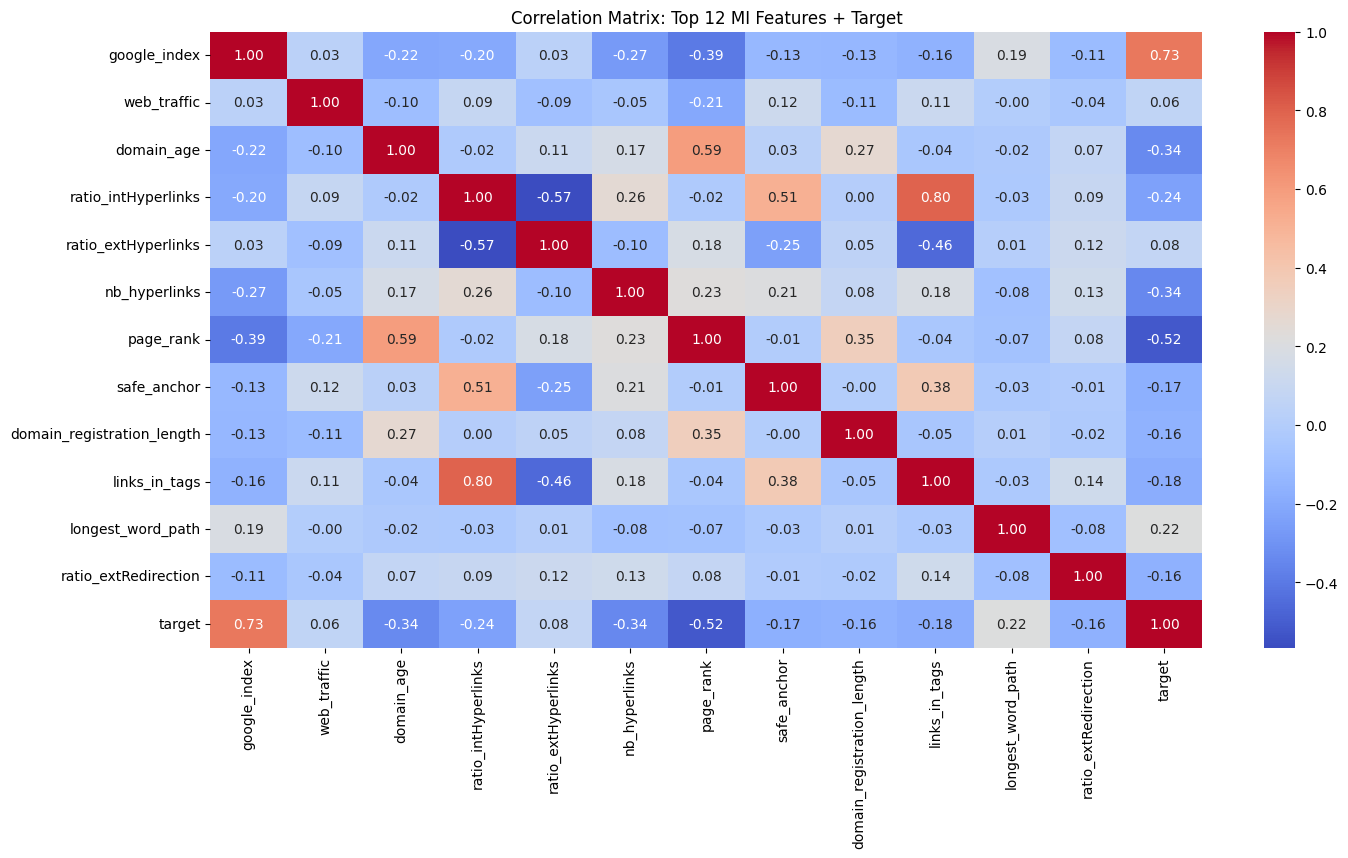

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Top 12 MI Features + Target')
plt.show()


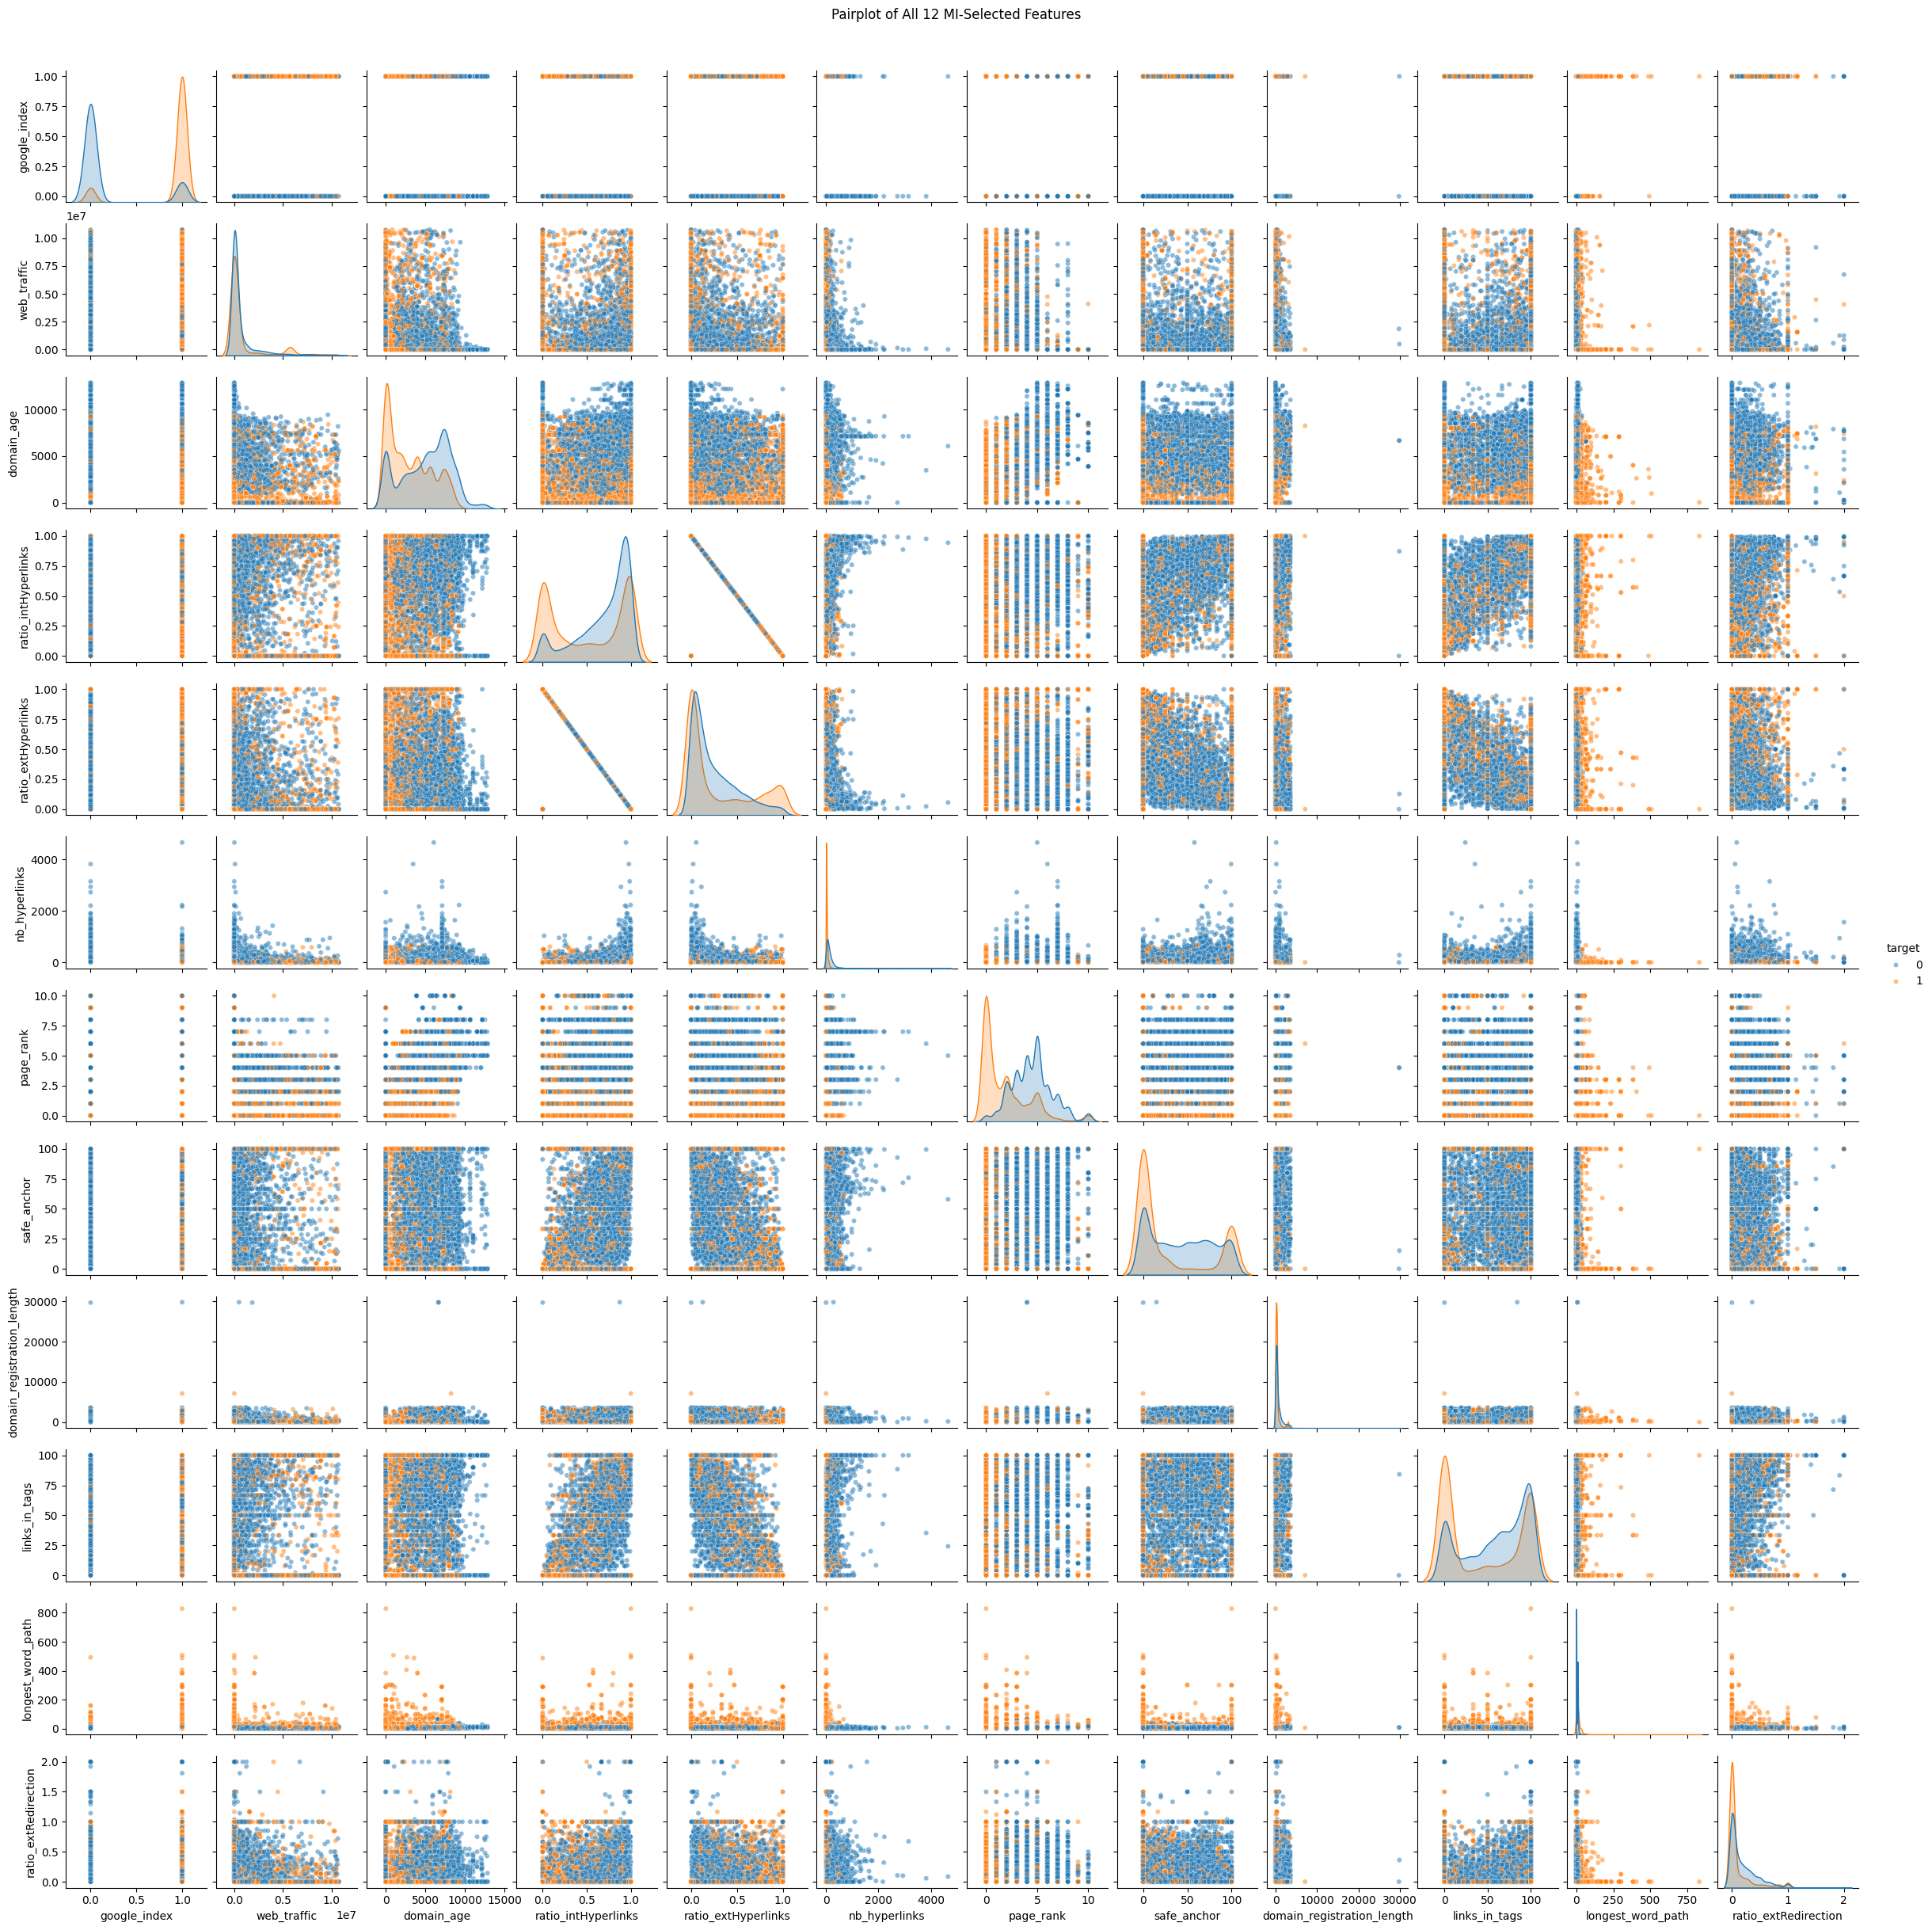

In [ ]:
sns.pairplot(df_selected, hue = 'target', plot_kws = {'alpha': 0.5, 's': 20}, height = 2)
plt.suptitle("Pairplot of All 12 MI-Selected Features", y = 1.02)
plt.show()

### The KDE plot is not helping to differentiate between some features, like longest_word_by_path, or domain_registration_length.

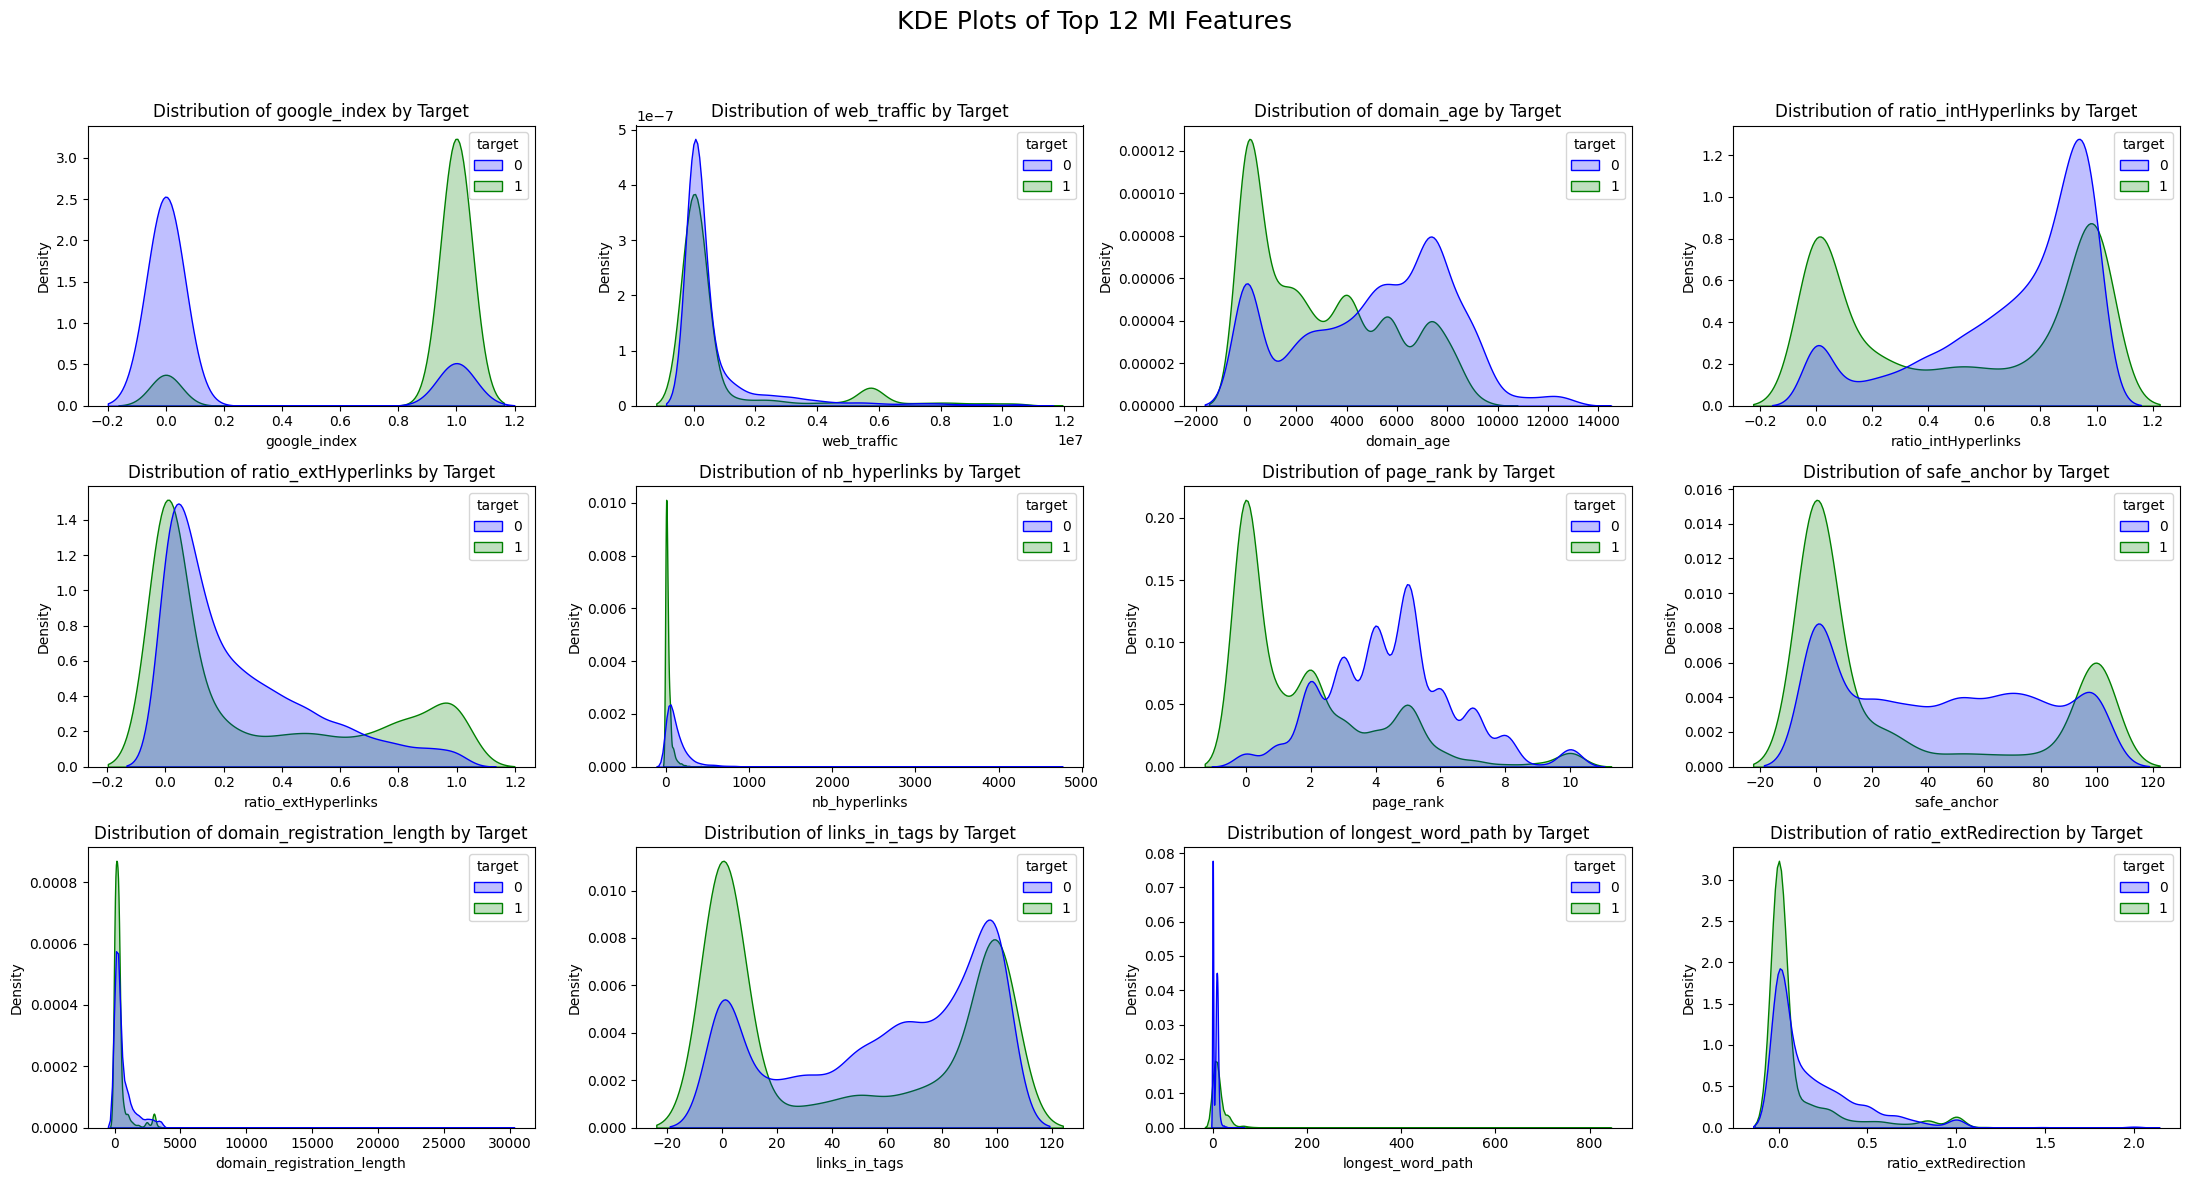

In [ ]:
features = df_selected.columns[:-1]
n_features = len(features)

rows = 3
cols = 4


fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
fig.suptitle('KDE Plots of Top 12 MI Features', fontsize=18)

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sns.kdeplot(data = df_selected, x = feature, hue='target', fill = True, ax = ax, palette={0: 'blue', 1: 'green'})
    axes[row, col].set_title(f'Distribution of {feature} by Target')


plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()




### Boxplot shows, like for web_traffic, many outliers, but Mutual-Information was second-highest for it, maybe there is some relation not visible explicitly.

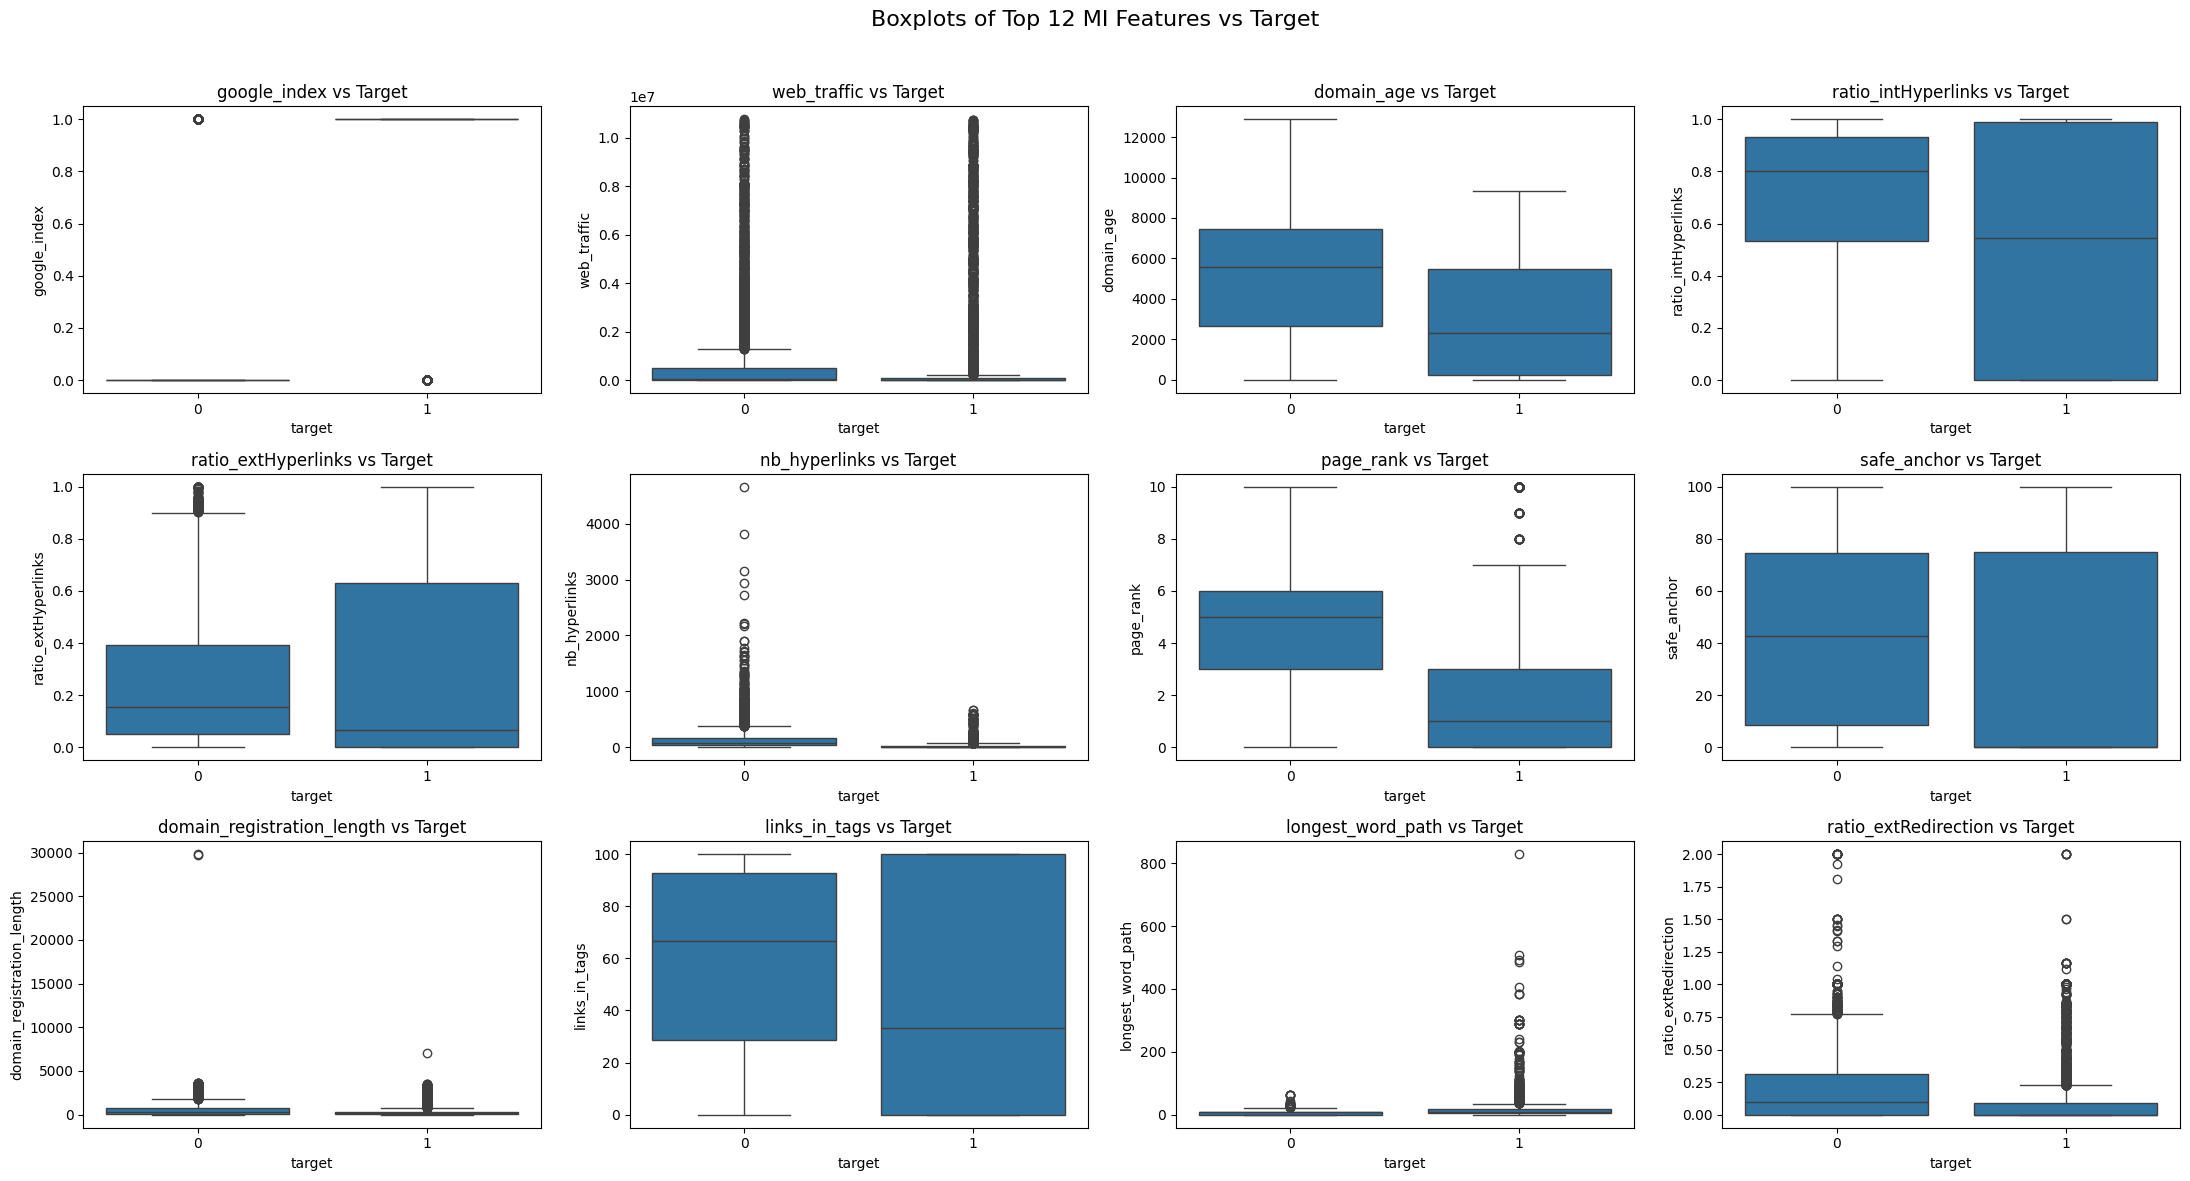

In [ ]:
features = df_selected.columns[:-1]
n_features = len(features)

rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize = (22, 12))
fig.suptitle('Boxplots of Top 12 MI Features vs Target', fontsize = 16)

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    sns.boxplot(x='target', y=feature, data=df_selected, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Target')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Violin plot also cannot differentiate between many columns.

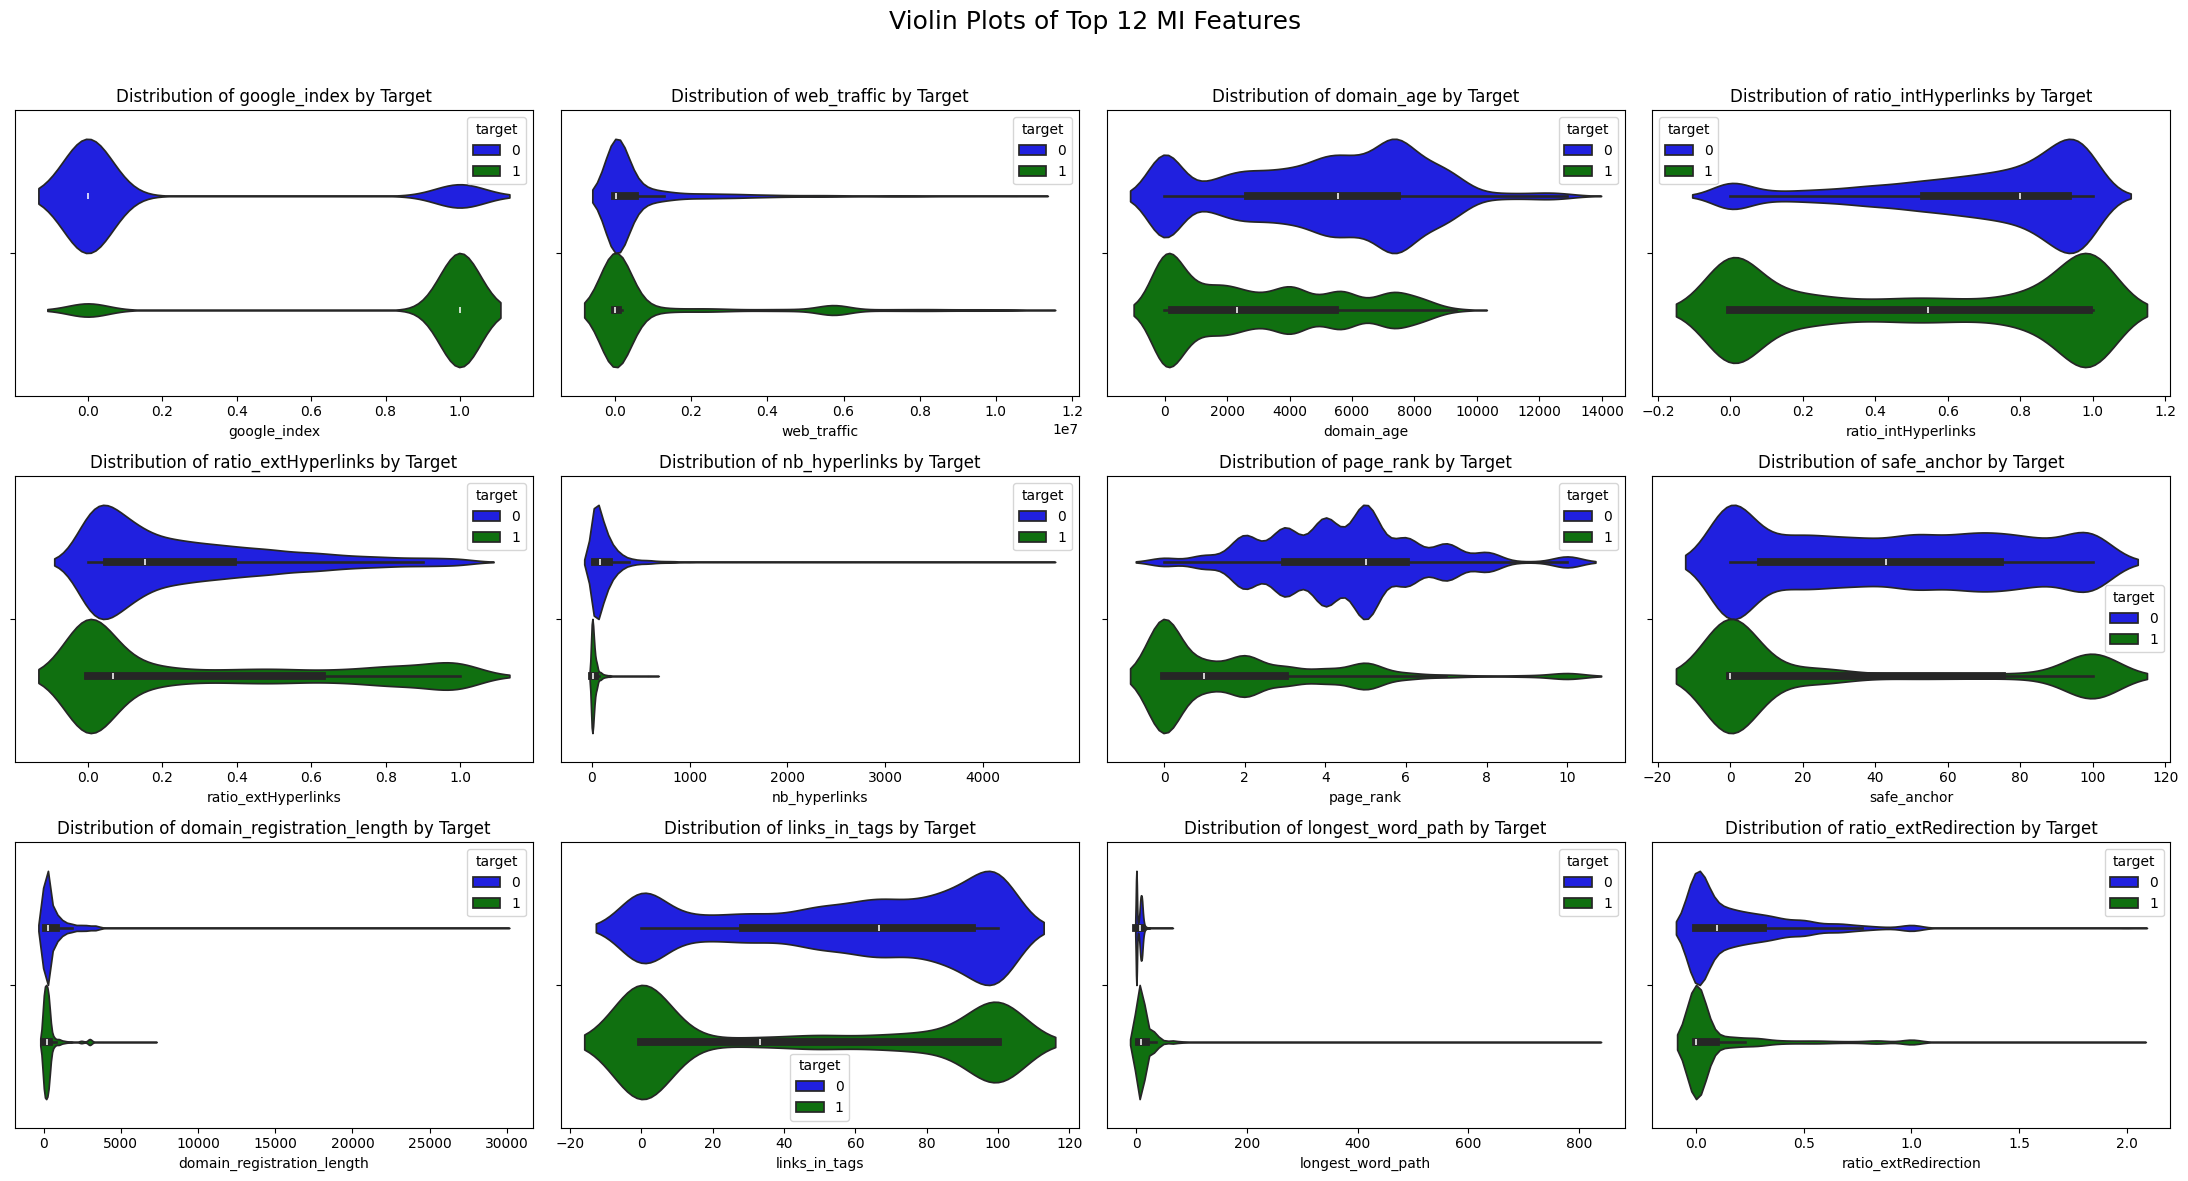

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
fig.suptitle('Violin Plots of Top 12 MI Features', fontsize=18)

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sns.violinplot(data = df_selected, x = feature, hue='target', fill = True, ax = ax, palette={0: 'blue', 1: 'green'})
    axes[row, col].set_title(f'Distribution of {feature} by Target')


plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()




In [ ]:
outlier_counts = {}
outlier_flags = pd.DataFrame(index = df_selected.index)

for feature in features:
    Q1 = df_selected[feature].quantile(0.25)
    Q3 = df_selected[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    is_outlier = (df_selected[feature] < lower) | (df_selected[feature] > upper)
    outlier_counts[feature] = is_outlier.sum()
    outlier_flags[feature] = is_outlier


combined_outlier_mask = outlier_flags.any(axis = 1)
total_outlier_rows = combined_outlier_mask.sum()
outlier_counts_series = pd.Series(outlier_counts).sort_values(ascending = False)

print("Outlier count per feature:\n")
print(outlier_counts_series)
print("\nTotal number of rows with outliers in any column:", total_outlier_rows)


Outlier count per feature:

web_traffic                   2086
domain_registration_length    1501
ratio_extRedirection           977
nb_hyperlinks                  920
longest_word_path              919
ratio_intHyperlinks              0
google_index                     0
domain_age                       0
safe_anchor                      0
page_rank                        0
ratio_extHyperlinks              0
links_in_tags                    0
dtype: int64

Total number of rows with outliers in any column: 5368


### nb_hyperlinks and longest_word_path shows clear difference between class in terms of outliers, will have to see, still apply log transformation.

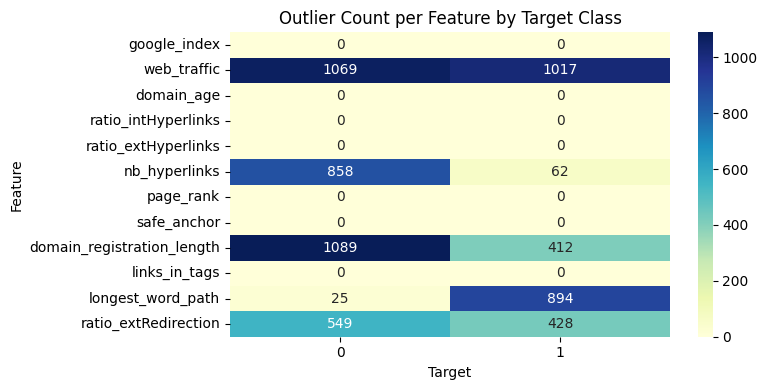

In [ ]:
outlier_flags['target'] = df_selected['target']

grouped_outliers = outlier_flags.groupby('target').sum().T  # Transpose for better readability

plt.figure(figsize=(8, 4))
sns.heatmap(grouped_outliers, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Outlier Count per Feature by Target Class')
plt.ylabel('Feature')
plt.xlabel('Target')
plt.tight_layout()
plt.show()


In [ ]:
# df_selected.groupby('target').agg(['mean', 'median', 'std']).T

### Skewness values also back previous KDE and Box plots.

In [ ]:
skewness = df_selected.drop(columns = 'target').skew()
skewness = skewness.sort_values(ascending = False)
skewness

longest_word_path             12.384111
domain_registration_length     9.795815
nb_hyperlinks                  7.630049
web_traffic                    2.789656
ratio_extRedirection           2.328812
ratio_extHyperlinks            1.023483
safe_anchor                    0.503617
page_rank                      0.451517
domain_age                     0.172170
google_index                  -0.108561
links_in_tags                 -0.160702
ratio_intHyperlinks           -0.544195
dtype: float64

### Applying log transformation on selected columns to mitigate skewness.

In [ ]:
skewed_cols = ['ratio_extRedirection','web_traffic', 'nb_hyperlinks', 'domain_registration_length', 'longest_word_path']


In [ ]:
for col in skewed_cols:
    print(f"{col}: Min = {df_selected[col].min()}")


ratio_extRedirection: Min = 0.0
web_traffic: Min = 0
nb_hyperlinks: Min = 0
domain_registration_length: Min = -1
longest_word_path: Min = 0


In [ ]:
df_selected_skew_fix = df_selected.copy()

skewness = df_selected.drop(columns = 'target').skew()
skewness = skewness.sort_values(ascending = False)

# based on skewness values
skewed_cols = ['ratio_extRedirection','web_traffic', 'nb_hyperlinks', 'domain_registration_length', 'longest_word_path']


for col in skewed_cols:
    df_selected_skew_fix[col] = np.log1p(df_selected_skew_fix[col].clip(lower = 0))


In [ ]:
outlier_counts = {}
outlier_flags = pd.DataFrame(index = df_selected_skew_fix.index)


for feature in features:
    Q1 = df_selected_skew_fix[feature].quantile(0.25)
    Q3 = df_selected_skew_fix[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    is_outlier = (df_selected_skew_fix[feature] < lower) | (df_selected_skew_fix[feature] > upper)
    outlier_counts[feature] = is_outlier.sum()
    outlier_flags[feature] = is_outlier


combined_outlier_mask = outlier_flags.any(axis = 1)
total_outlier_rows = combined_outlier_mask.sum()
outlier_counts_series = pd.Series(outlier_counts).sort_values(ascending = False)

print("Outlier count per feature:\n")
print(outlier_counts_series)
print("\nTotal number of rows with outliers in any column:", total_outlier_rows)


Outlier count per feature:

domain_registration_length    1476
ratio_extRedirection           688
longest_word_path                2
nb_hyperlinks                    2
ratio_intHyperlinks              0
domain_age                       0
web_traffic                      0
google_index                     0
safe_anchor                      0
page_rank                        0
ratio_extHyperlinks              0
links_in_tags                    0
dtype: int64

Total number of rows with outliers in any column: 2069


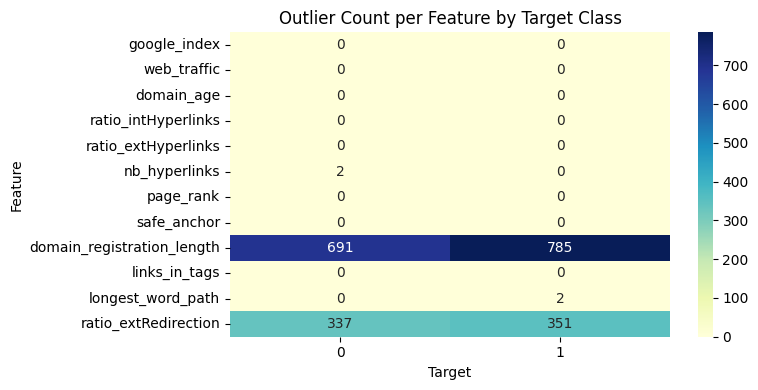

In [ ]:
outlier_flags['target'] = df_selected_skew_fix['target']
grouped_outliers = outlier_flags.groupby('target').sum().T

plt.figure(figsize = (8, 4))
sns.heatmap(grouped_outliers, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Outlier Count per Feature by Target Class')
plt.ylabel('Feature')
plt.xlabel('Target')
plt.tight_layout()
plt.show()


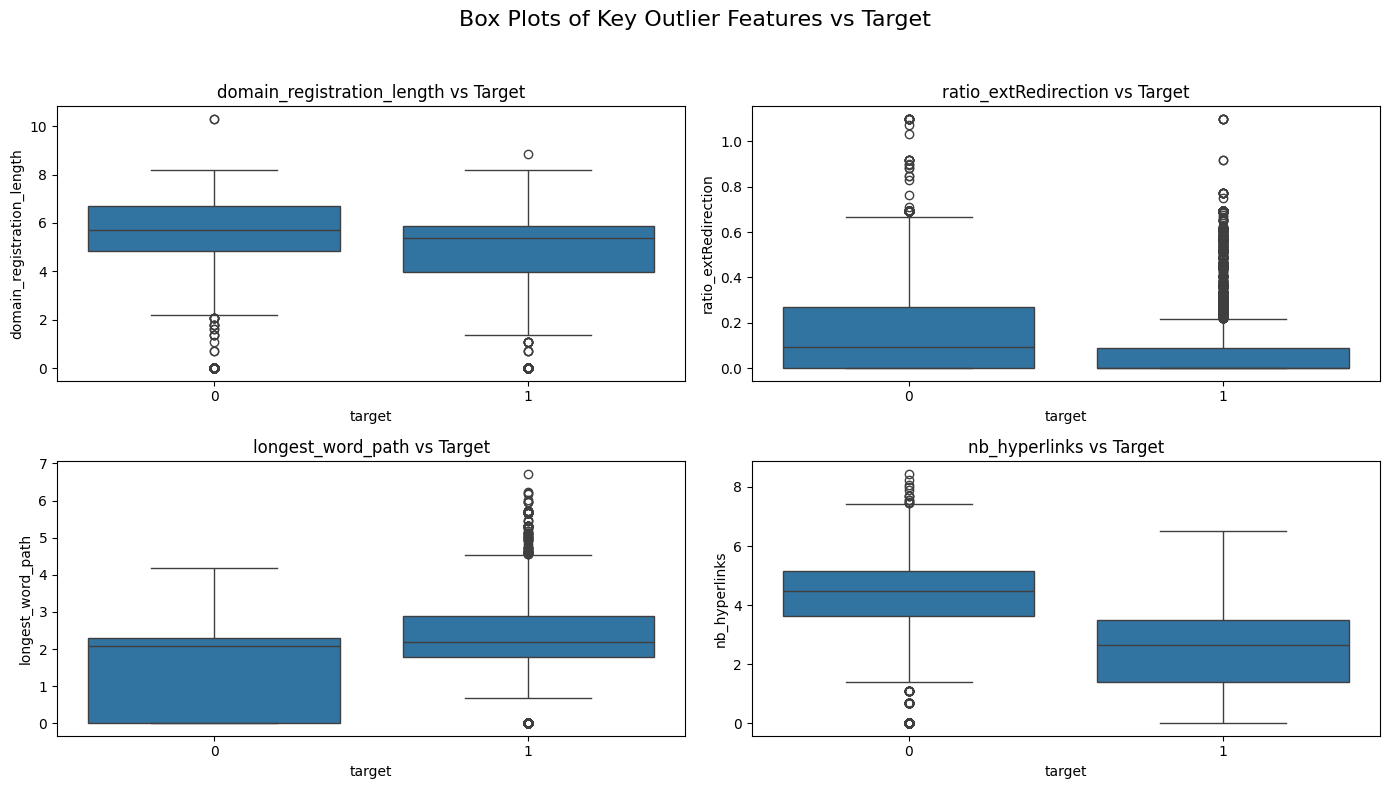

In [ ]:
features = ['domain_registration_length', 'ratio_extRedirection',
            'longest_word_path', 'nb_hyperlinks']

rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(14, 8))
fig.suptitle('Box Plots of Key Outlier Features vs Target', fontsize=16)

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    sns.boxplot(x='target', y=feature, data=df_selected_skew_fix, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Target')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### KDE plots and Violing plots are also showing better separation than before, after applying log transformation(like for longest_word_by_path).

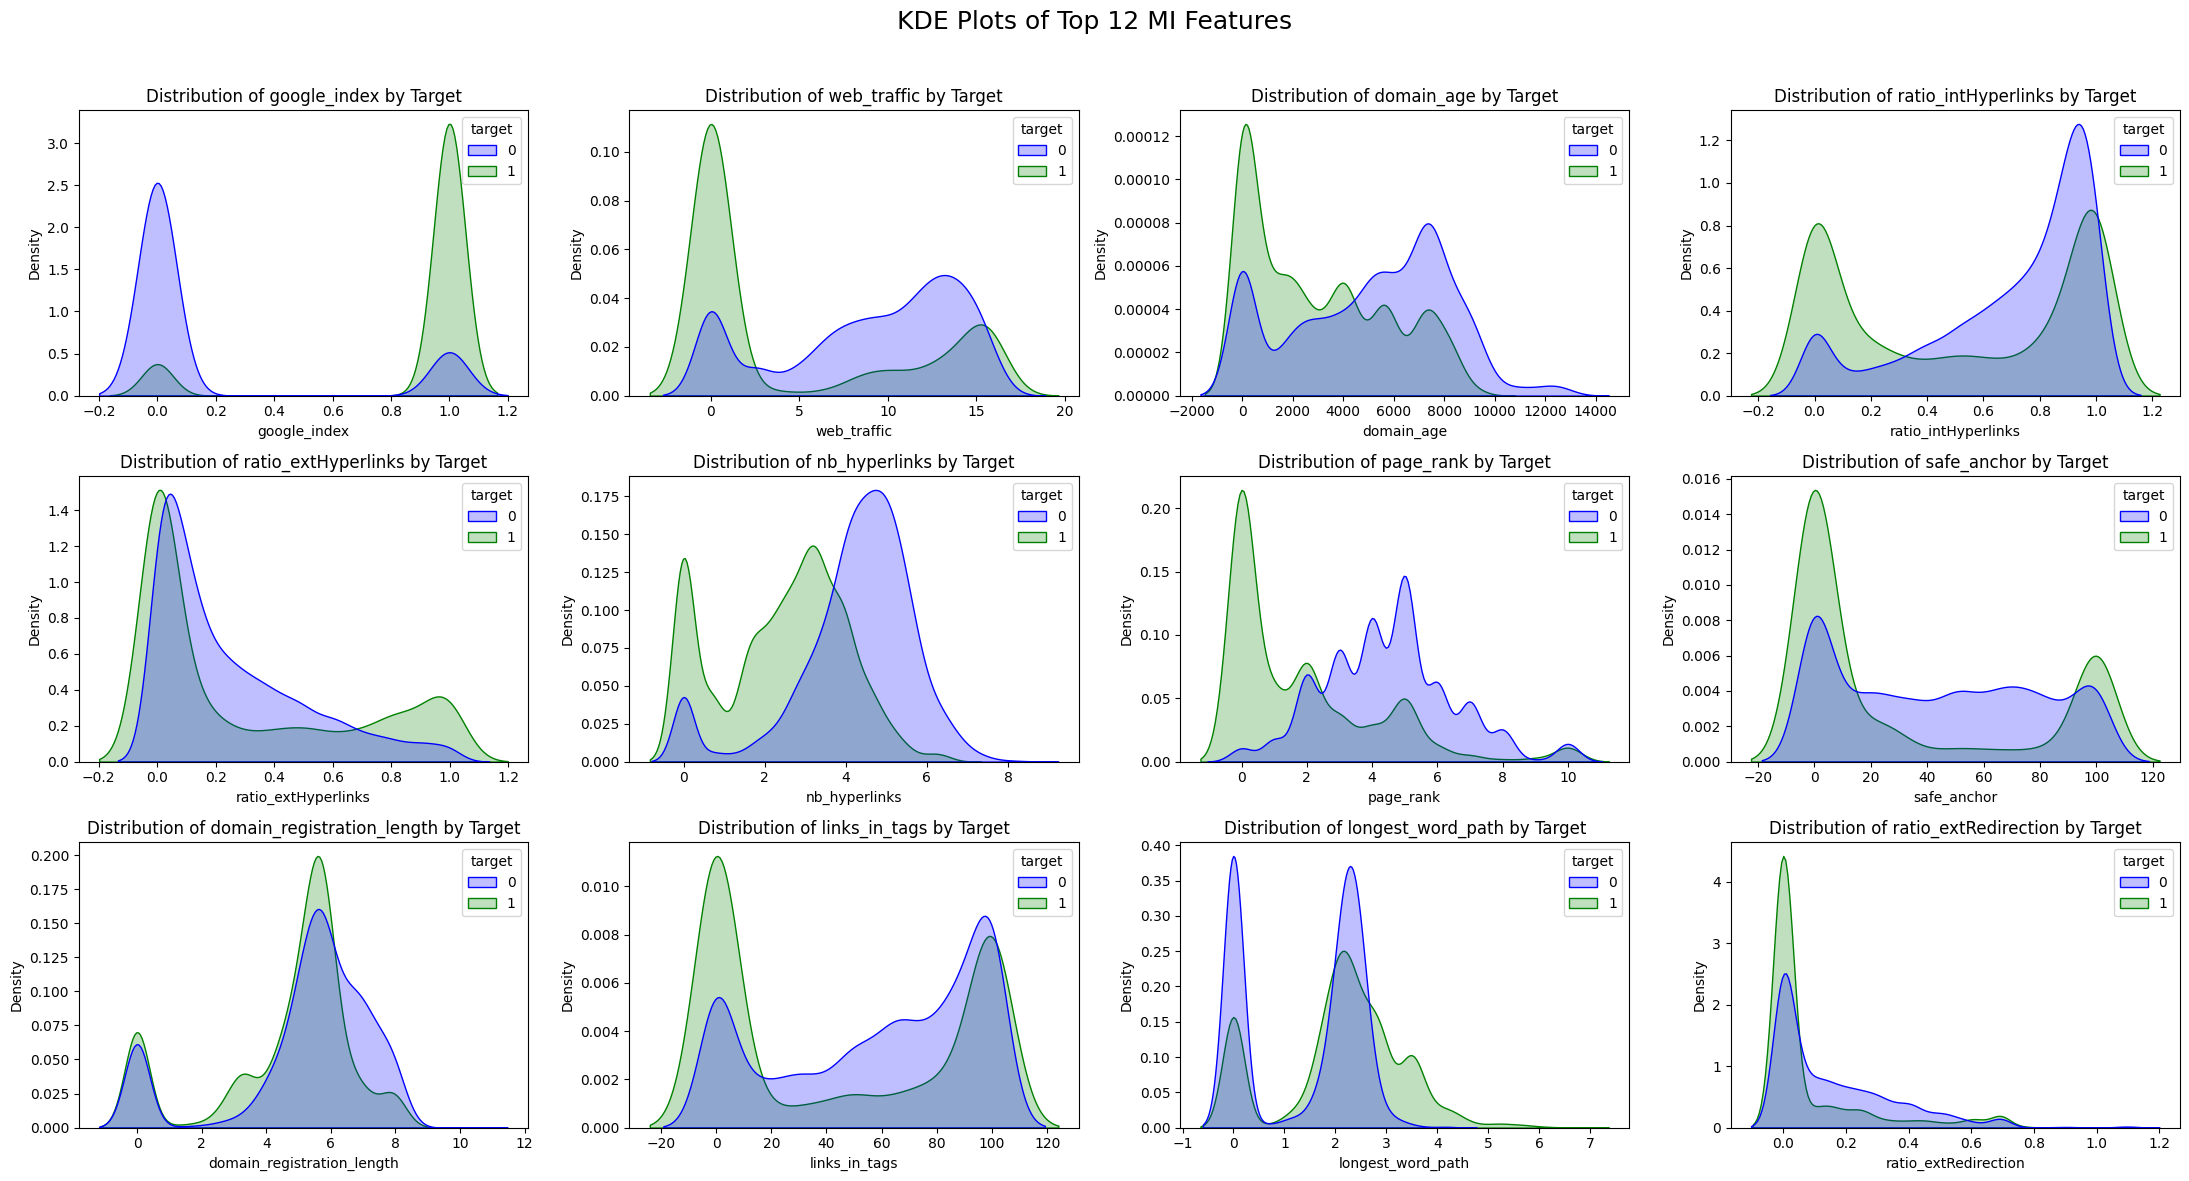

In [ ]:
features = df_selected_skew_fix.columns[:-1]
n_features = len(features)

rows = 3
cols = 4


fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
fig.suptitle('KDE Plots of Top 12 MI Features', fontsize=18)

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sns.kdeplot(data = df_selected_skew_fix, x = feature, hue='target', fill = True, ax = ax, palette={0: 'blue', 1: 'green'})
    axes[row, col].set_title(f'Distribution of {feature} by Target')


plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()




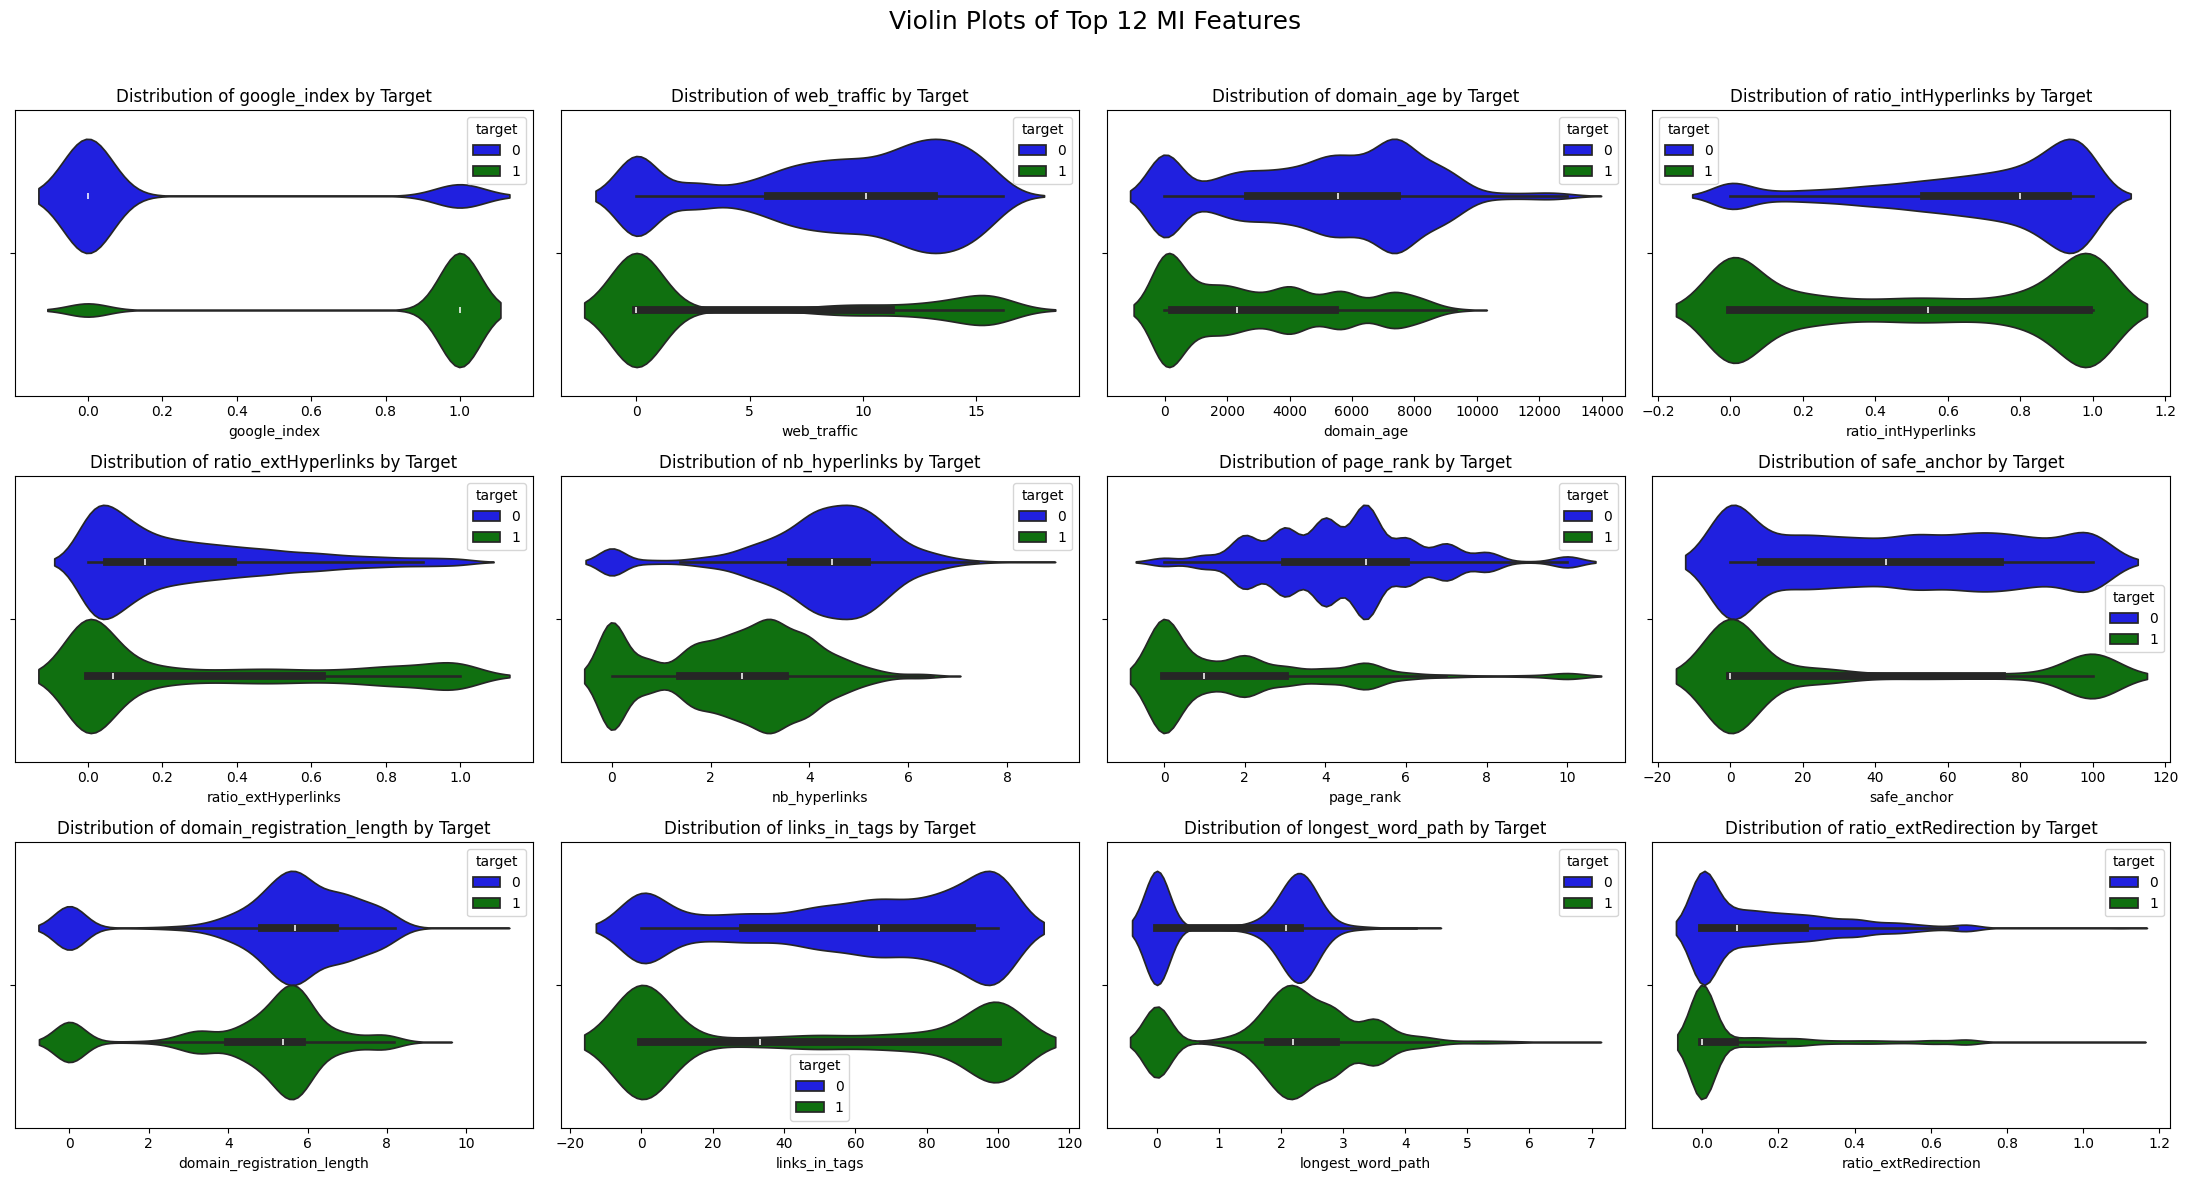

In [ ]:
features = df_selected_skew_fix.columns[:-1]
n_features = len(features)

rows = 3
cols = 4


fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
fig.suptitle('Violin Plots of Top 12 MI Features', fontsize=18)

for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sns.violinplot(data = df_selected_skew_fix, x = feature, hue='target', fill = True, ax = ax, palette={0: 'blue', 1: 'green'})
    axes[row, col].set_title(f'Distribution of {feature} by Target')


plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()




### Correlation matrix shows little stronger relation, but not significant, so linear models might not be suitable.

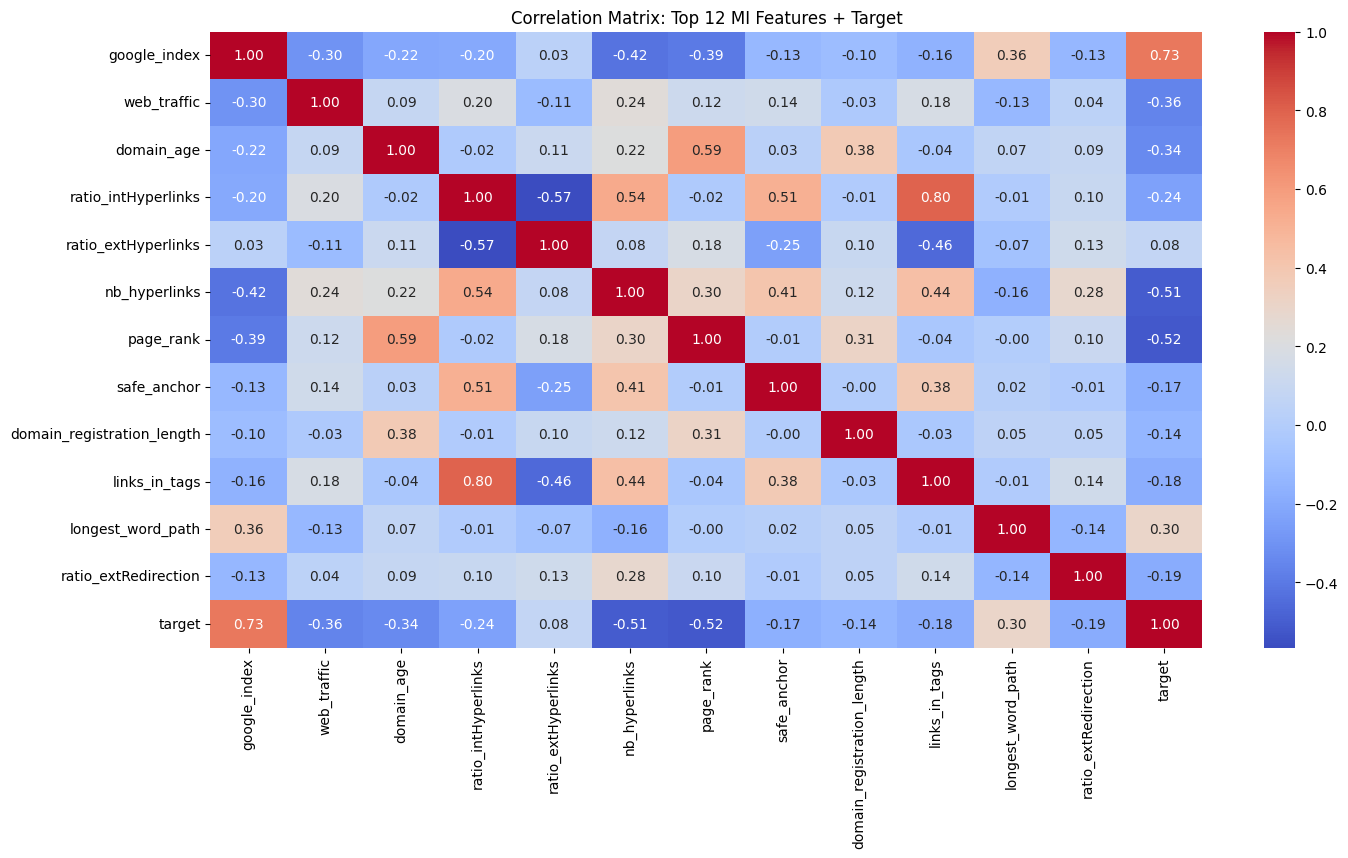

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_selected_skew_fix.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Top 12 MI Features + Target')
plt.show()


# **Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
x = df_selected_skew_fix.drop(columns = 'target')
y = df_selected_skew_fix['target']

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    'Logistic Regression': make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000)
    ),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'SVM': make_pipeline(
        StandardScaler(),
        SVC(probability=True, kernel='rbf')
    ),
    'Naive Bayes': GaussianNB(),
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring = 'accuracy')
    print(f"{name}: CV Accuracy = {scores.mean():.3f} ± {scores.std():.3f}")


Logistic Regression: CV Accuracy = 0.902 ± 0.007
Random Forest: CV Accuracy = 0.930 ± 0.009
SVM: CV Accuracy = 0.914 ± 0.010
Naive Bayes: CV Accuracy = 0.900 ± 0.007


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 4,
    scoring = 'recall',
    n_jobs = -1,
    verbose = 1
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Fitting 4 folds for each of 162 candidates, totalling 648 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 0.9309426815323041


In [ ]:
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_rf.predict(x_test)

threshold = 0.5
y_pred_thresh = (y_pred >= threshold).astype(int)

In [ ]:
import seaborn as sns

print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4520
           1       0.94      0.94      0.94      4484

    accuracy                           0.94      9004
   macro avg       0.94      0.94      0.94      9004
weighted avg       0.94      0.94      0.94      9004



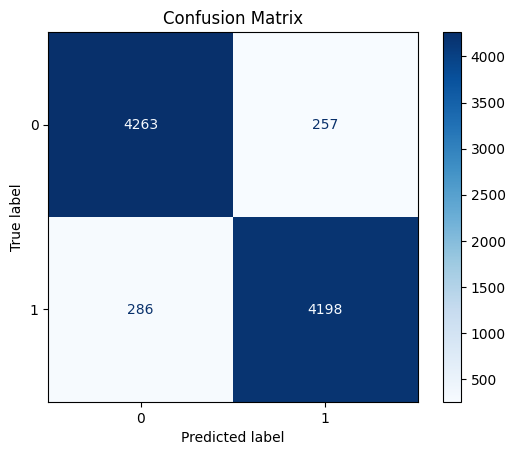

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

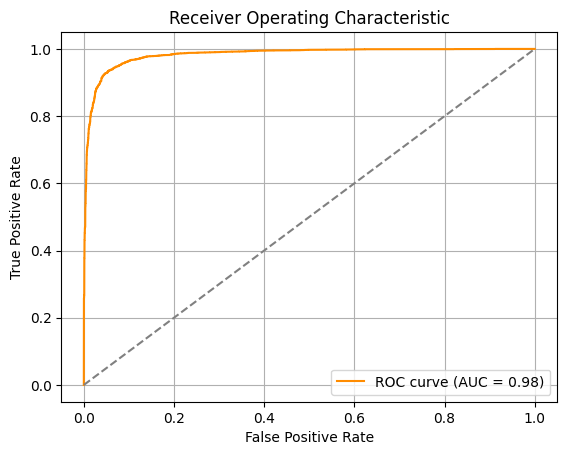

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import numpy as np

# Binary classification
y_proba = best_rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()


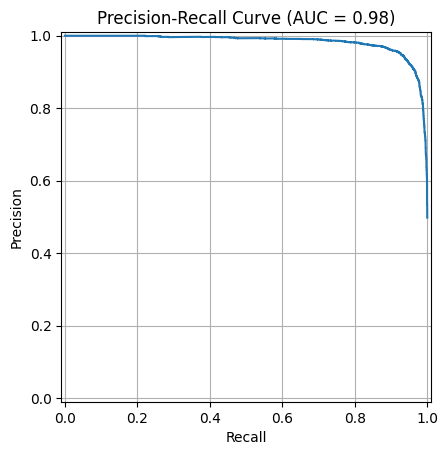

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_proba = best_rf.predict_proba(x_test)[:, 1]

# Compute precision-recall pairs and AUC
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Plot
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title(f"Precision-Recall Curve (AUC = {pr_auc:.2f})")
plt.grid()
plt.show()


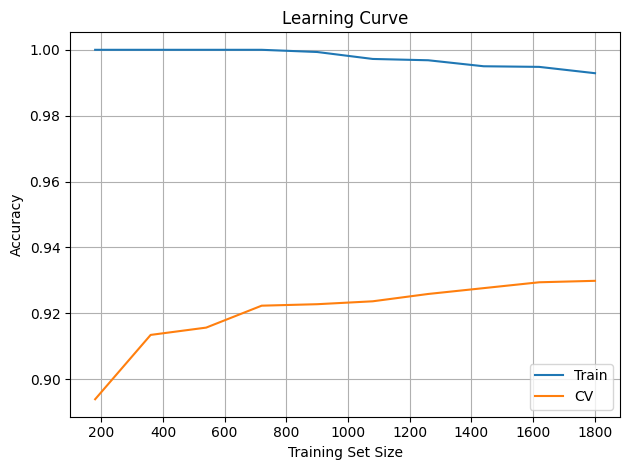

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='CV')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


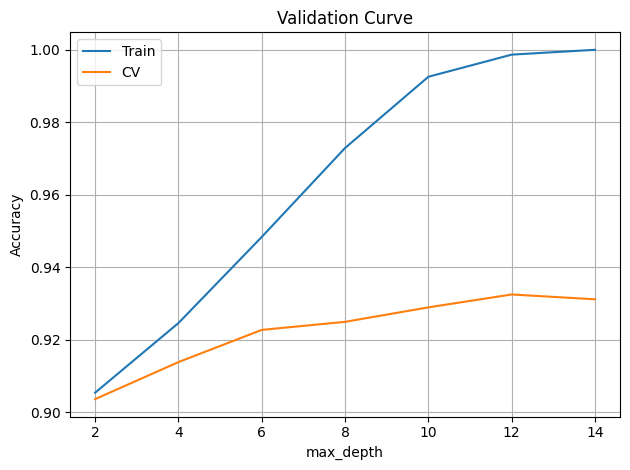

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [2, 4, 6, 8, 10, 12, 14]
train_scores, val_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X = x_train, y = y_train,
    param_name = "max_depth",
    param_range = param_range,
    cv=5, scoring = "accuracy", n_jobs = -1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(param_range, train_mean, label = "Train")
plt.plot(param_range, val_mean, label = "CV")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
